# TZ3108 is an [18F] Tracer Studied in Non-human Primates

## Setup

In [3]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

# basic numeric setup
import numpy as np
from matplotlib import pyplot as plt

from Huang1980Model import Huang1980Model
from Ichise2002VascModel import Ichise2002VascModel
from Ichise2002Model import Ichise2002Model
from TZ3108 import TZ3108

TrivialArtery: found data for tracer tz3108
{'fqfp': '/Users/jjlee/Singularity/TZ3108/derivatives/sub-ollie/ses-20230516/pet/sub-ollie_ses-20230516_trc-tz3108_proc-verified-aif',
 'halflife': 6586.236,
 'img': array([1.35276408e-03, 2.72704016e-01, 2.70335383e+01, ...,
       5.11007428e-01, 5.11007428e-01, 5.11007428e-01]),
 'nii': <nibabel.nifti1.Nifti1Image object at 0x329b28880>,
 'taus': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'times': array([1.99999998e+00, 7.99999998e+00, 1.40000000e+01, 1.90000000e+01,
       2.60000000e+01, 3.20000000e+01, 3.70000000e+01, 4.40000000e+01,
       5.00000000e+01, 5.50000000e+01, 6.50000000e+01, 7.60000000e+01,
       8.60000000e+01, 9.60000000e+01, 1.06000000e+02, 1.16000000e+02,
       1.76000000e+02, 2.36000000e+02, 2.96000000e+02, 5.97000000e+02,
       8.96000000e+02, 1.19600000e+03, 1.49600000e+03, 1.79600000e+03,
       2.09600000e+0

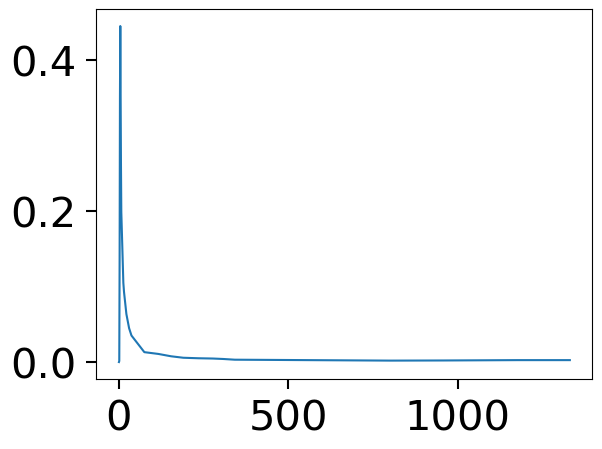

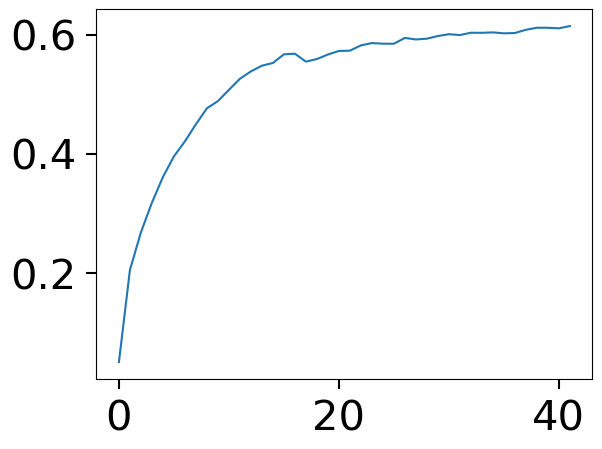

In [4]:
# define data & models
petdir = os.path.join(os.getenv("SINGULARITY_HOME"), "TZ3108", "derivatives", "sub-ollie", "ses-20230516", "pet")
twil = os.path.join(petdir, "sub-ollie_ses-20230516_trc-tz3108_proc-verified-aif.nii.gz")
pet = os.path.join(petdir, "sub-ollie_ses-20230516_trc-tz3108_proc-verified-tacs.nii.gz")

testline = TZ3108(twil,
                  pet,
                  truths=[0.463279, 0.000029, 0.104074],
                  nlive=7,
                  tag="main-tz3108-testline-7",
                  model="LineModel",
                  delta_time=8)
%matplotlib inline
plt.figure()
plt.plot(testline.data(testline.truths)["inputFuncInterp"])
plt.figure()
plt.plot(testline.data(testline.truths)["rho"])

# Parameter 0: 0.463279 [0.408222, 0.516439]
# Parameter 1: 0.000029 [0.000019, 0.000038]
# Parameter 2: 0.104074 [0.084945, 0.133244]





parc_index = 1  # whole brain

## Inspect Huang1980Model twil

In [5]:
v = testline.truths
pprint("===================================== v ======================================")
pprint(v)

data = testline.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.463279, 2.9e-05, 0.104074]
'==================================== data ===================================='
{'delta_time': 8,
 'halflife': 6586.236,
 'inputFuncInterp': array([6.80455628e-06, 1.37173203e-03, 1.35981754e-01, ...,
       2.57042514e-03, 2.57042514e-03, 2.57042514e-03]),
 'martinv1': array(0.05),
 'raichleks': None,
 'rho': array([0.05030765, 0.20492752, 0.26810379, 0.31791721, 0.36089407,
       0.39554433, 0.42073949, 0.44944175, 0.47624623, 0.4882847 ,
       0.50720296, 0.52577618, 0.53815782, 0.54771692, 0.55232654,
       0.56678915, 0.56784485, 0.554537  , 0.5588467 , 0.56648747,
       0.57245858, 0.5729663 , 0.58177737, 0.58568642, 0.5846651 ,
       0.58457538, 0.59434298, 0.59176   , 0.59305701, 0.59751712,
       0.60056097, 0.59913174, 0.60304843, 0.6029013 , 0.60363644,
       0.60206108, 0.60255149, 0.60795286, 0.61141793, 0.61135952,
       0.61046876, 0.61424653]),
 'rhoUs

('============================== testline.data2t(data) '
 '===============================')
array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.0797e+04, 1.0798e+04,
       1.0799e+04])
('============================= testline.data2taus(data) '
 '=============================')
array([ 60.   ,  60.   ,  60.   , 120.   , 120.   , 120.   , 120.   ,
       180.   , 180.   , 180.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 299.474])
('=========================== testline.data2timesMid(data) '
 '===========================')
array([   30.   ,    90.   ,   150.   ,   240.   ,   360.   ,   480.   ,
         600.   ,   750.   ,   930.   ,  1110.   ,  1350.   ,  1650.   ,
        1950.   ,  2250.   ,  2550.   ,  2850.   ,  3150.   , 

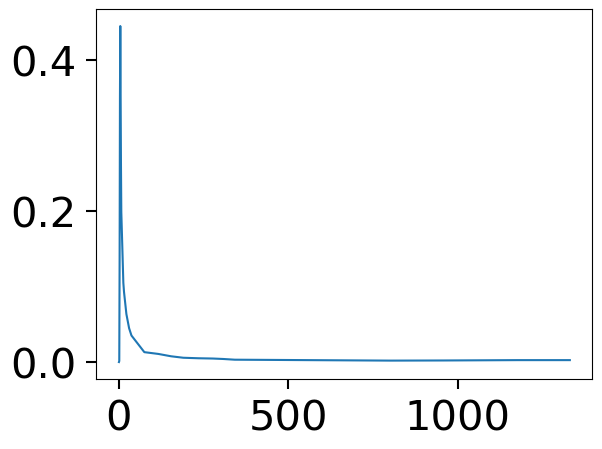

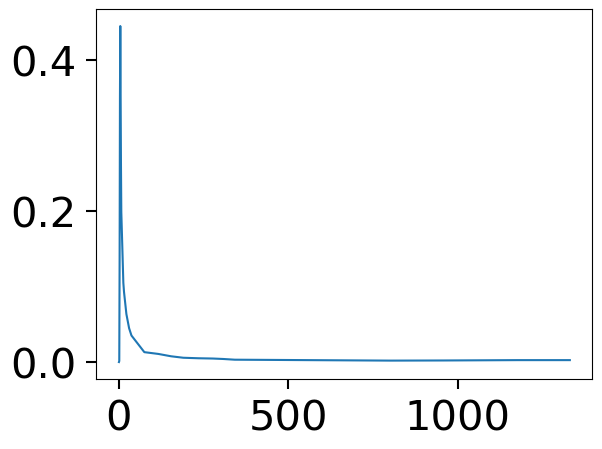

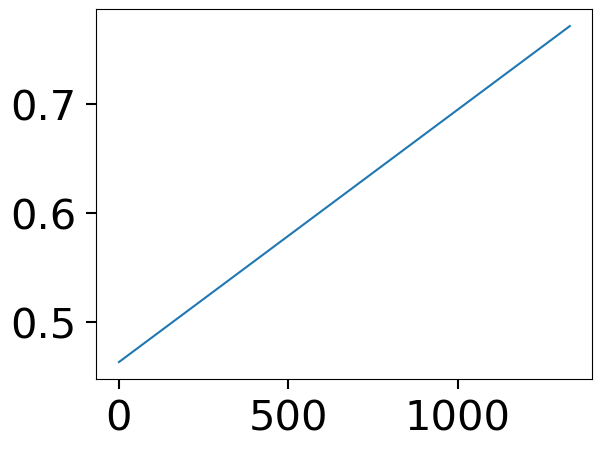

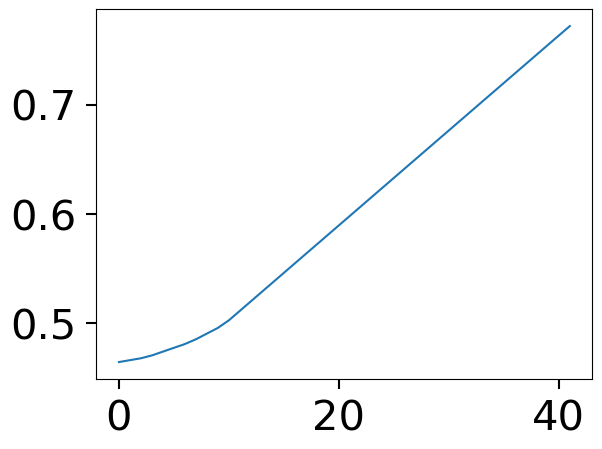

In [6]:
pprint("============================== testline.data2t(data) ===============================")
pprint(testline.data2t(data))
pprint("============================= testline.data2taus(data) =============================")
pprint(testline.data2taus(data))
pprint("=========================== testline.data2timesMid(data) ===========================")
pprint(testline.data2timesMid(data))
pprint("================================== testline.fqfp ===================================")
pprint(testline.fqfp)
pprint("========================== testline.input_function() =========================")
pprint(testline.input_function())
pprint("================================= testline.labels ==================================")
pprint(testline.labels)
pprint("====================== testline.load_nii(testline.fqfp + '.nii.gz') ======================")
pprint(testline.load_nii(testline.fqfp + ".nii.gz"))
pprint("=============================== testline.loglike(v) ================================")
pprint(testline.loglike(v))
pprint("================================== testline.ndim ===================================")
pprint(testline.ndim)
pprint("========================= testline.parse_halflife(testline.fqfp) =========================")
pprint(testline.parse_halflife(testline.fqfp))
pprint("========================= testline.parse_isotope(testline.fqfp) ==========================")
pprint(testline.parse_isotope(testline.fqfp))
pprint("================================== testline.sigma ==================================")
pprint(testline.sigma)
pprint("============================ testline.signalmodel(data) ============================")
pprint(testline.signalmodel(data))

%matplotlib inline
rho, timesMid, rho_t, times, rho_os, rho_p = testline.signalmodel(data, verbose=True)
plt.figure()
plt.plot(rho_p)
plt.figure()
plt.plot(rho_os)
plt.figure()
plt.plot(rho_t)
plt.figure()
plt.plot(rho)

## Plot Huang1980Model twil

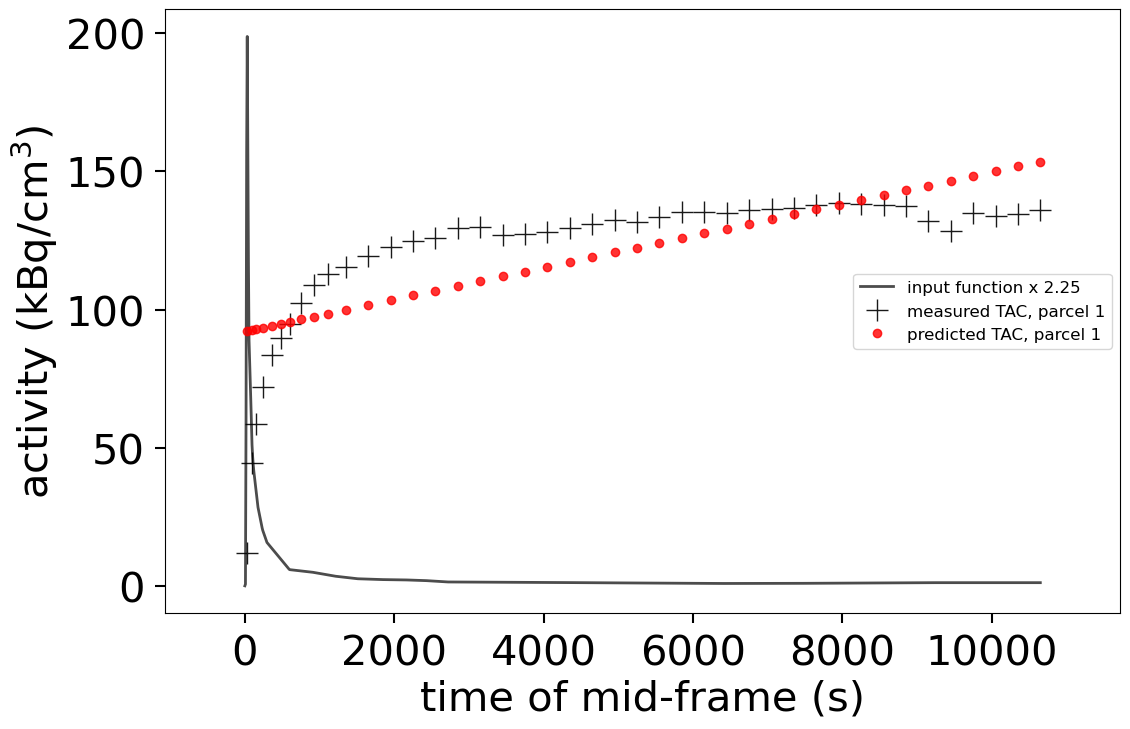

In [7]:
testline.plot_truths(parc_index=parc_index)

In [8]:
testline.truths

[0.463279, 2.9e-05, 0.104074]

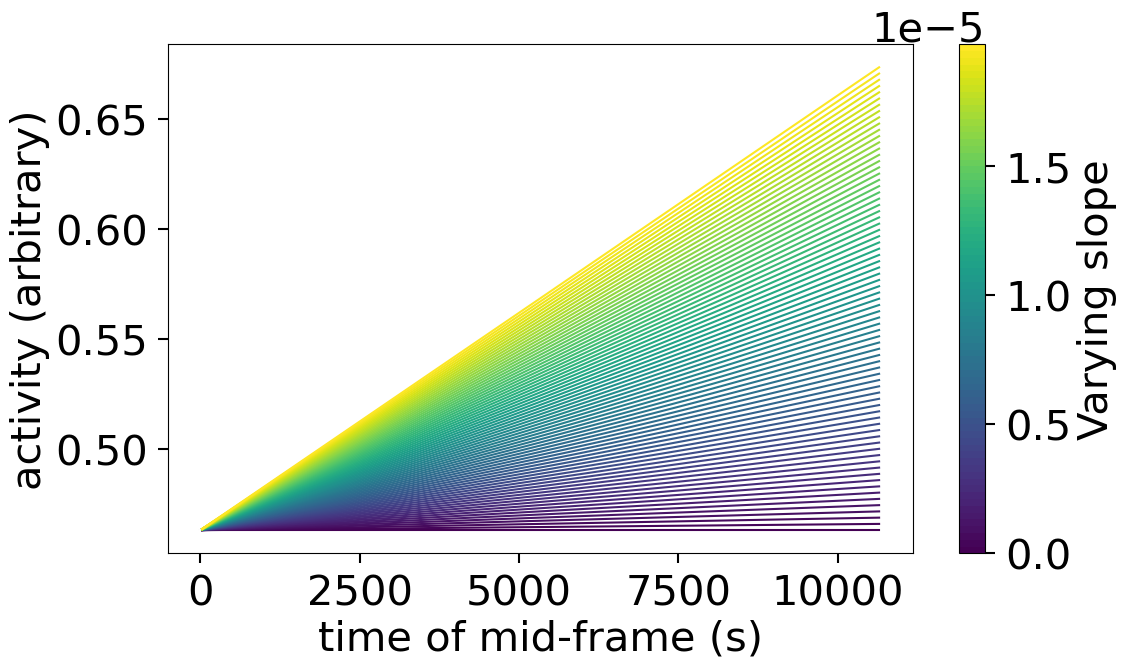

In [9]:
testline.plot_variations(1, 0.0, 2e-5, testline.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

iter: 12349 | batch: 362 | bound: 13 | nc: 1 | ncall: 374137 | eff(%):  3.299 | loglstar: 33.856 < 37.245 < 36.919 | logz: 20.582 +/-  0.134 | stop:  0.997                                           

Parameter 0: 0.463279 [0.408222, 0.516439]
Parameter 1: 0.000029 [0.000019, 0.000038]
Parameter 2: 0.104074 [0.084945, 0.133244]
Parameter 0: 0.463279 [0.408222, 0.516439]
Parameter 1: 0.000029 [0.000019, 0.000038]
Parameter 2: 0.104074 [0.084945, 0.133244]


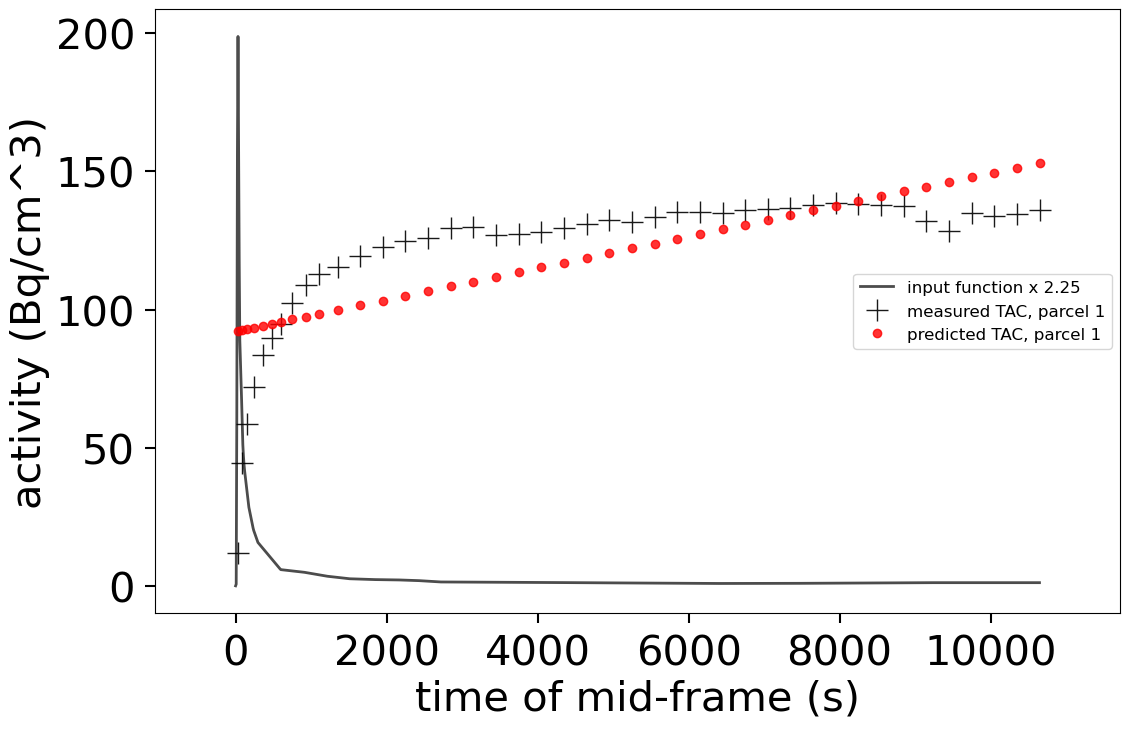

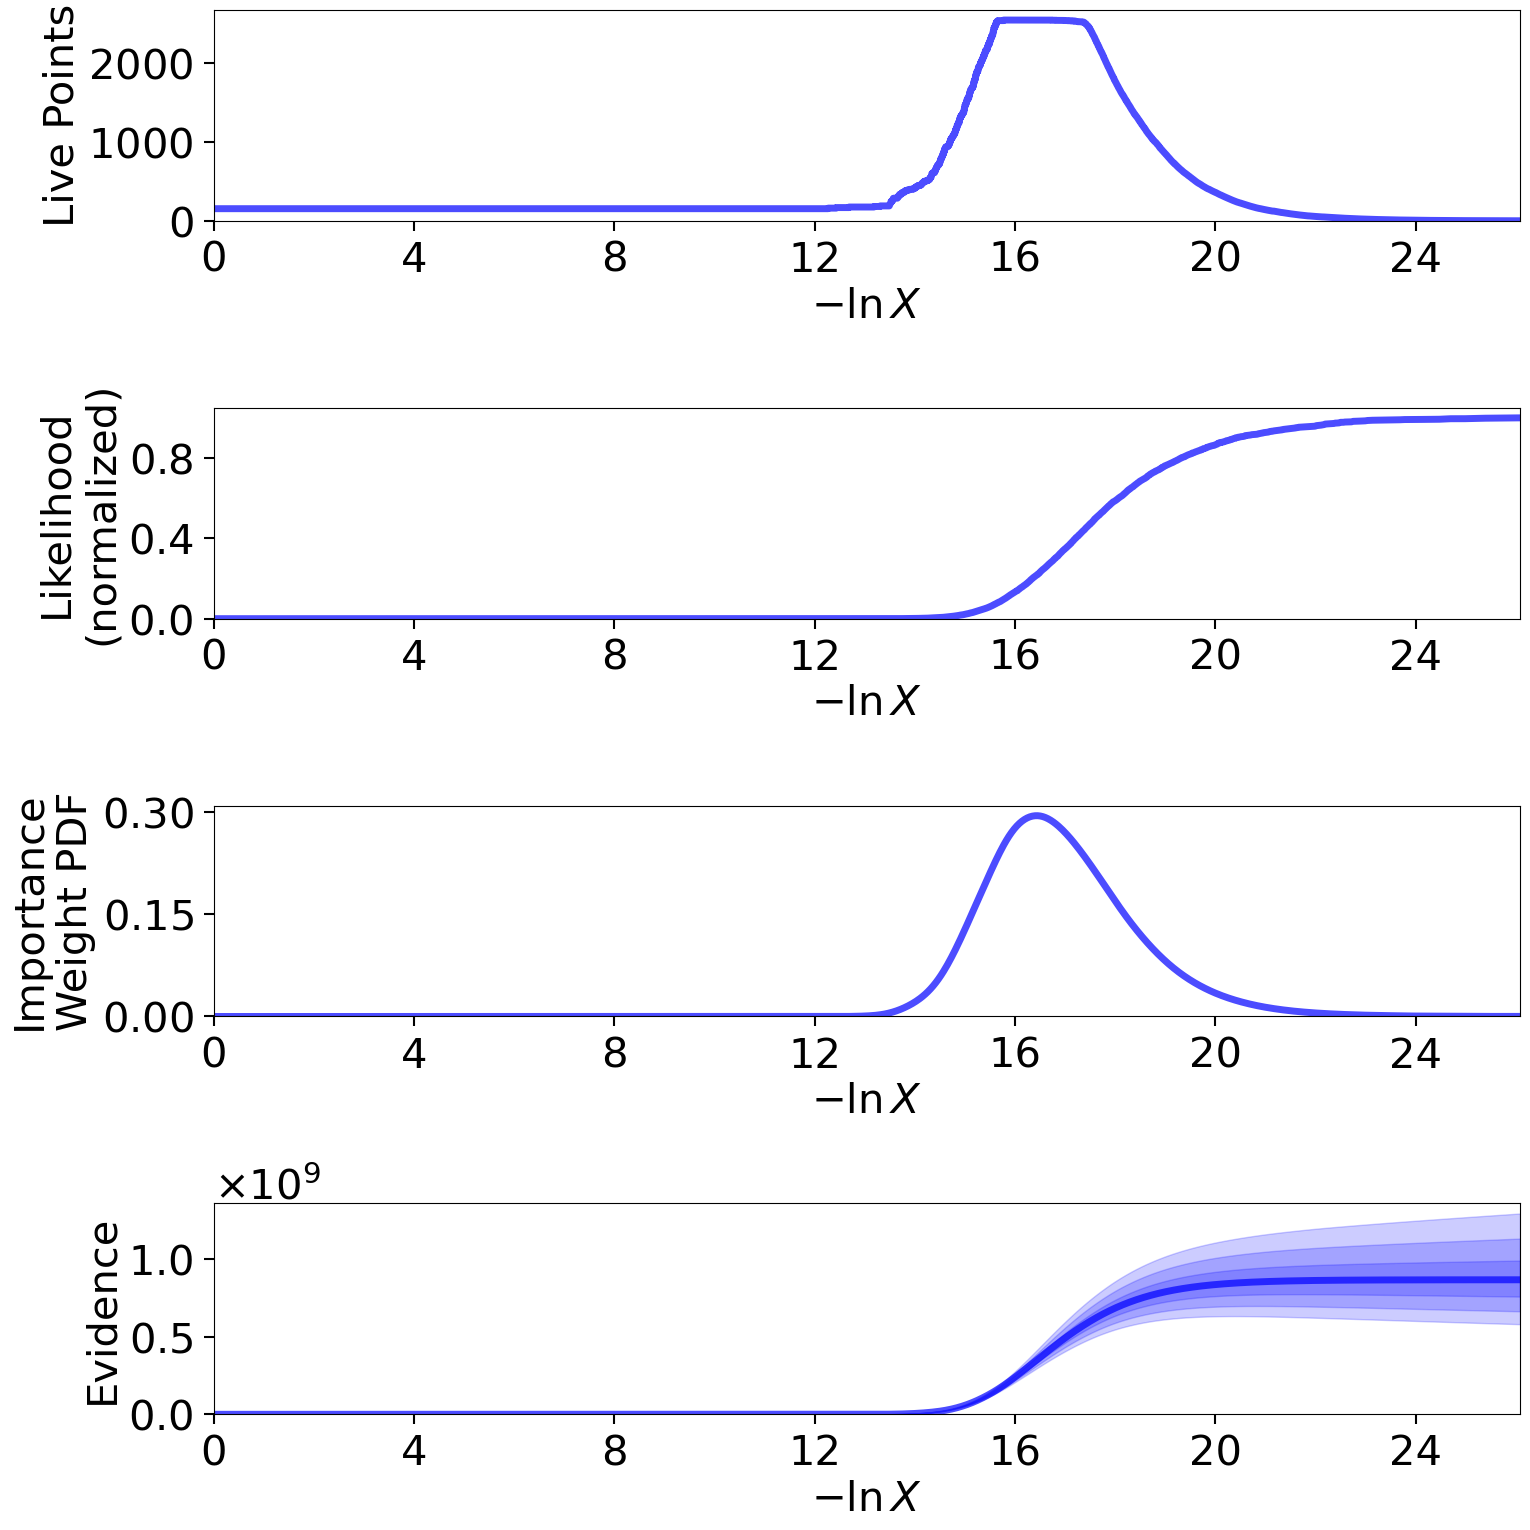

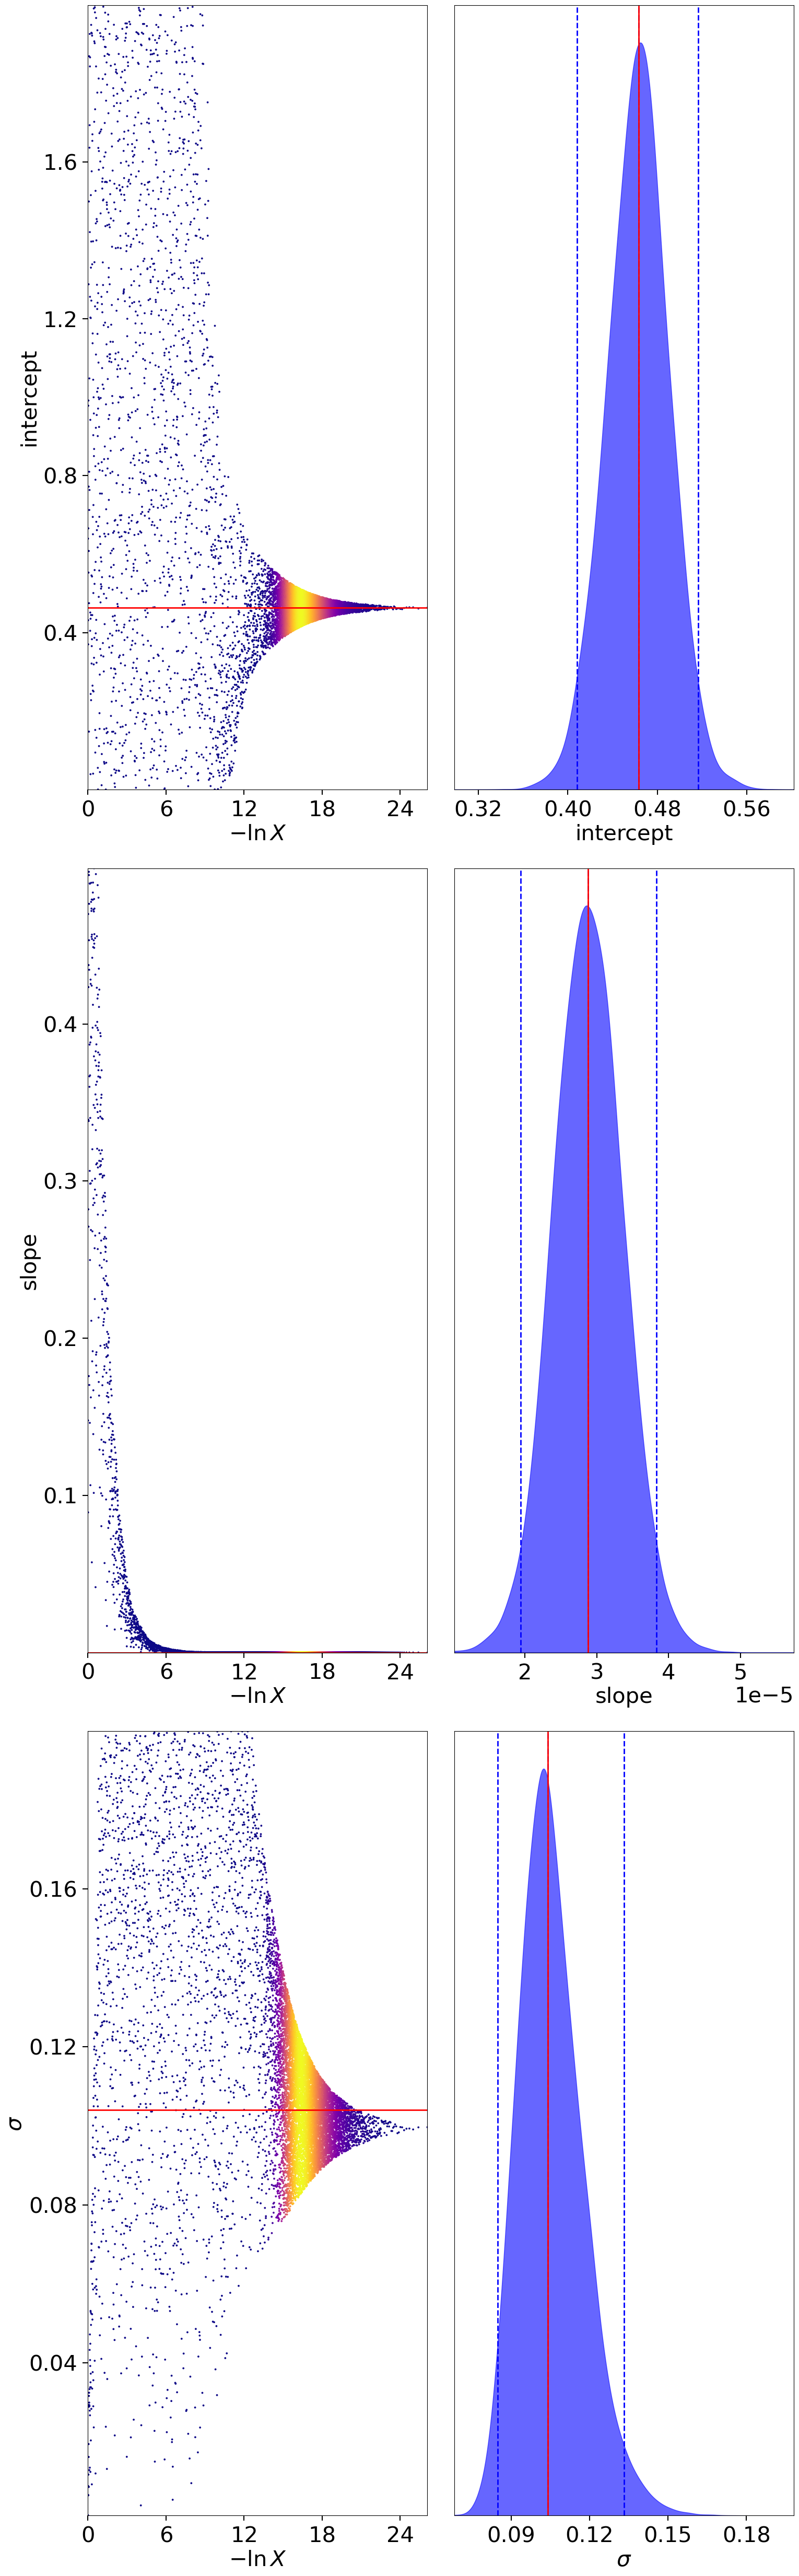

In [10]:
# de novo
res_twil = testline.run_nested_for_indexed_tac(parc_index, print_progress=True)
testline.save_results(res_twil, "playground-for-TZ3108-Huang")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(testline.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results